# Diabetes - EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading data
d_data = pd.read_csv('/Users/kaylakim/Documents/TheUnicornTwins/TUT.Projects/MedicalPros/Diabetes/diabetes.csv')

# printing the first 5 rows
d_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
d_data.shape

(768, 9)

>We've got 8 features and 768 samples.

In [4]:
d_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
for i in range(0, 9):
    print(d_data.columns[i])
    i = d_data[d_data.columns[i]].unique()
    print(i)
print('\n')

Pregnancies
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 9

>We've got all features with continuous variables.

## Univariate Analysis
- ### Continuous Variables

### I. Centrality measures (Central Tendency)
- Mean
- Median
- Mode
- Min
- Max

In [6]:
import plotly.express as px
def boxplot_of(data, name_of_col): # ' '
    fig_box = px.box(data, y=name_of_col)
    fig_box.show()

In [7]:
round(d_data.describe(), 2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [54]:
d_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

>We can see there are some features which get min values are zero.

>'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'

In [8]:
from scipy import stats
for i in d_data.columns:
    print(stats.mode(d_data[i], keepdims=False))

ModeResult(mode=1, count=135)
ModeResult(mode=99, count=17)
ModeResult(mode=70, count=57)
ModeResult(mode=0, count=227)
ModeResult(mode=0, count=374)
ModeResult(mode=32.0, count=13)
ModeResult(mode=0.254, count=6)
ModeResult(mode=22, count=72)
ModeResult(mode=0, count=500)


### II. Measures of dispersion
- Range
- Quartile
- IQR
- Variance
- Standard Deviation
- Skewness and Kurtosis

In [9]:
def measures_of_dispersion(col):
    #Range
    range_ = round(col.max() - col.min(), 3)
    print(f"Range= {range_}\n")

    #Quartile
    import numpy as np
    Q1 = round(np.percentile(col, 25), 3)
    Q2 = round(np.percentile(col, 50), 3)
    Q3 = round(np.percentile(col, 75), 3)
    print(f"Q1= {Q1}\nQ2= {Q2}\nQ3= {Q3}\n")

    ##Interquartile Range
    IQR = round(Q3 - Q1, 3)
    print(f"IQR= {IQR}\n")

    #Variance
    print(f"Variance= {round(col.var(), 3)}\n")

    #Standard Deviation
    print(f"Standard Deviation= {round(col.std(), 3)}\n")
    # import statistics
    # statistics.stdev()

    #Skewness
    #import scipy
    #scipy.stats.skew()
    skew = round(col.skew(), 3)
    print(f"Skewness= {skew}")
    if skew == 0:
        print('>>>Normal/ Symmetrical Distribution because skewness = 0')
    elif skew > 0:
        print('>>>Positive skew/ Right-skewed Distribution (mode < median < mean) because skewness > 0')
    else: #skew < 0
        print('>>>Negative skew/ Left-skewed Distribution (mode > median > mean) because skewness < 0\n') 

    #Kurtosis
    #scipy.stats.kurtosis()
    print(f"\nKurtosis= {round(col.kurtosis(), 3)}\n")

    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.distplot(col)
    plt.subplot(1, 2, 2)
    plt.hist(col)
    plt.show()

### III. Outliers

In [10]:
def outliers_of(data, name_of_col): # data[' ']
    import numpy as np
    Q1 = np.percentile(data[name_of_col], 25)
    Q3 = np.percentile(data[name_of_col], 75)
    
    #Interquartile Range
    IQR = round(Q3 - Q1, 3)
    
    #Number of upper outliers
    num_out_upper = data[data[name_of_col] > (Q3 + 1.5*IQR)].shape[0]
    print(f"The number of upper outliers= {num_out_upper}\n")

    #Number of lower outliers
    num_out_lower = data[data[name_of_col] < (Q1 - 1.5*IQR)].shape[0]
    print(f"The number of lower outliers= {num_out_lower}\n")

    #Percentage of outliers
    outliers_per = (num_out_upper + num_out_lower)/data.shape[0]
    print(f"The percentage of outliers= {round(outliers_per, 3)*100}%")

In [11]:
d_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### 1. 'Pregnancies'

In [12]:
boxplot_of(d_data, 'Pregnancies')

In [18]:
outliers_of(d_data, 'Pregnancies')

The number of upper outliers= 4

The number of lower outliers= 0

The percentage of outliers= 0.5%


Range= 17

Q1= 1.0
Q2= 3.0
Q3= 6.0

IQR= 5.0

Variance= 11.354

Standard Deviation= 3.37

Skewness= 0.902
>>>Positive skew/ Right-skewed Distribution (mode < median < mean) because skewness > 0

Kurtosis= 0.159



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



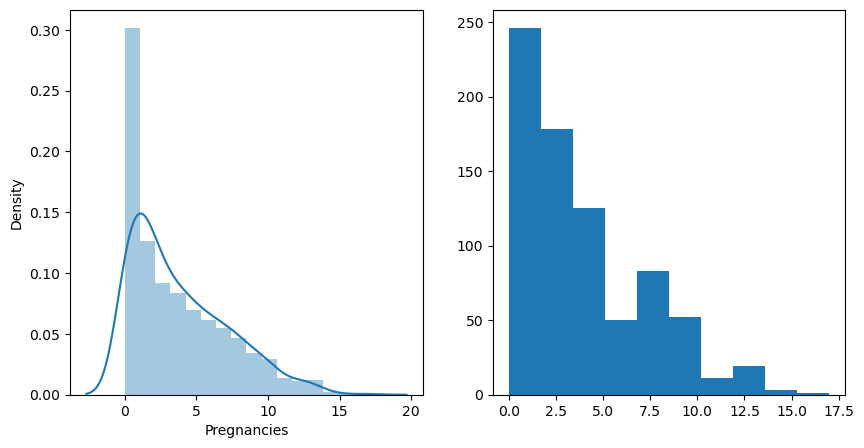

In [13]:
measures_of_dispersion(d_data.Pregnancies)

#### 2. 'Glucose'

In [14]:
boxplot_of(d_data, 'Glucose')

In [15]:
outliers_of(d_data, 'Glucose')

The number of upper outliers= 0

The number of lower outliers= 5

The percentage of outliers= 0.7000000000000001%


Range= 199

Q1= 99.0
Q2= 117.0
Q3= 140.25

IQR= 41.25

Variance= 1022.248

Standard Deviation= 31.973

Skewness= 0.174
>>>Positive skew/ Right-skewed Distribution (mode < median < mean) because skewness > 0

Kurtosis= 0.641



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



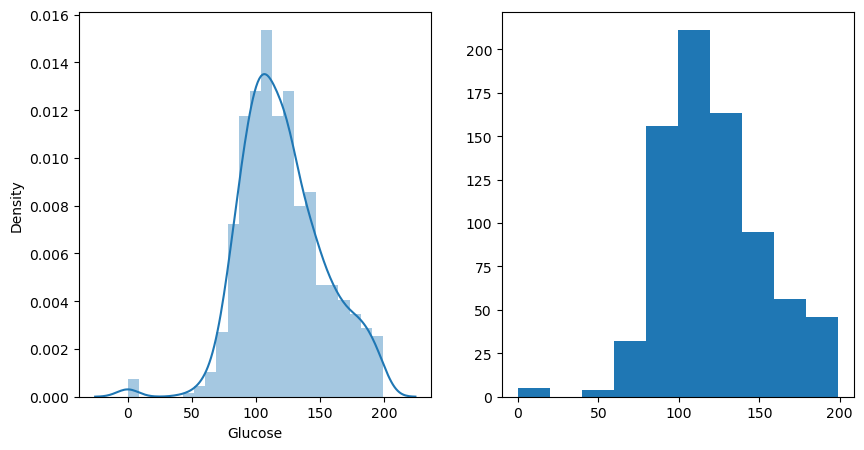

In [16]:
measures_of_dispersion(d_data.Glucose)

#### 3. 'BloodPressure'

In [20]:
boxplot_of(d_data, 'BloodPressure')

In [21]:
outliers_of(d_data, 'BloodPressure')

The number of upper outliers= 7

The number of lower outliers= 38

The percentage of outliers= 5.8999999999999995%


Range= 122

Q1= 62.0
Q2= 72.0
Q3= 80.0

IQR= 18.0

Variance= 374.647

Standard Deviation= 19.356

Skewness= -1.844
>>>Negative skew/ Left-skewed Distribution (mode > median > mean) because skewness < 0


Kurtosis= 5.18



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



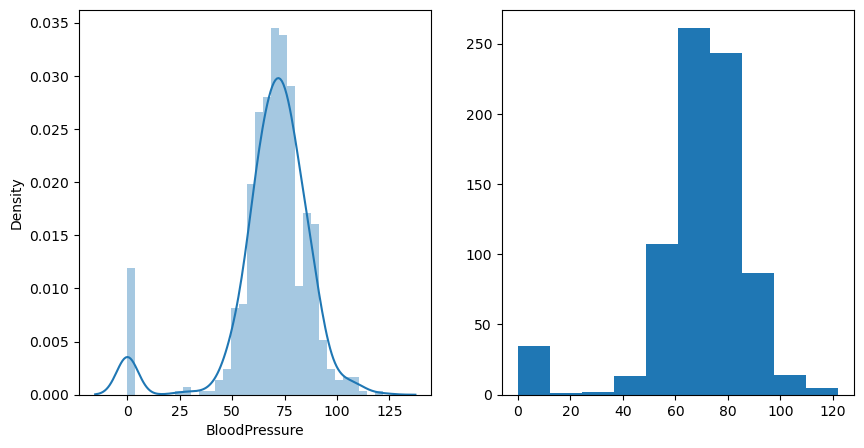

In [22]:
measures_of_dispersion(d_data.BloodPressure)

In [23]:
d_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### 4. 'SkinThickness'

In [24]:
boxplot_of(d_data, 'SkinThickness')

In [25]:
outliers_of(d_data, 'SkinThickness')

The number of upper outliers= 1

The number of lower outliers= 0

The percentage of outliers= 0.1%


Range= 99

Q1= 0.0
Q2= 23.0
Q3= 32.0

IQR= 32.0

Variance= 254.473

Standard Deviation= 15.952

Skewness= 0.109
>>>Positive skew/ Right-skewed Distribution (mode < median < mean) because skewness > 0

Kurtosis= -0.52



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



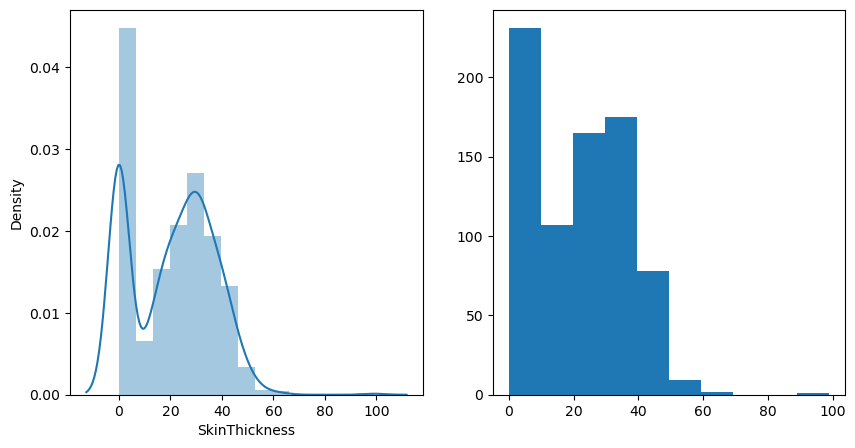

In [26]:
measures_of_dispersion(d_data.SkinThickness)

#### 5. 'Insulin'

In [28]:
boxplot_of(d_data, 'Insulin')

In [29]:
outliers_of(d_data, 'Insulin')

The number of upper outliers= 34

The number of lower outliers= 0

The percentage of outliers= 4.3999999999999995%


Range= 846

Q1= 0.0
Q2= 30.5
Q3= 127.25

IQR= 127.25

Variance= 13281.18

Standard Deviation= 115.244

Skewness= 2.272
>>>Positive skew/ Right-skewed Distribution (mode < median < mean) because skewness > 0

Kurtosis= 7.214



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



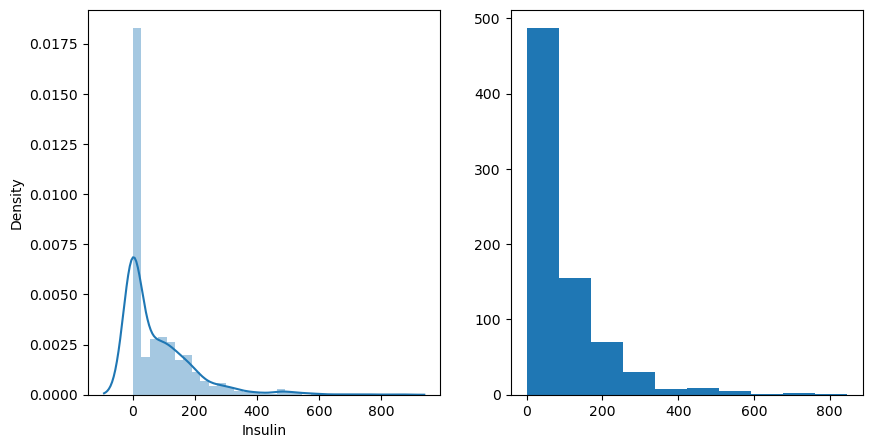

In [30]:
measures_of_dispersion(d_data.Insulin)

In [31]:
d_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### 6. 'BMI'

In [32]:
boxplot_of(d_data, 'BMI')

In [33]:
outliers_of(d_data, 'BMI')

The number of upper outliers= 8

The number of lower outliers= 11

The percentage of outliers= 2.5%


Range= 67.1

Q1= 27.3
Q2= 32.0
Q3= 36.6

IQR= 9.3

Variance= 62.16

Standard Deviation= 7.884

Skewness= -0.429
>>>Negative skew/ Left-skewed Distribution (mode > median > mean) because skewness < 0


Kurtosis= 3.29



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



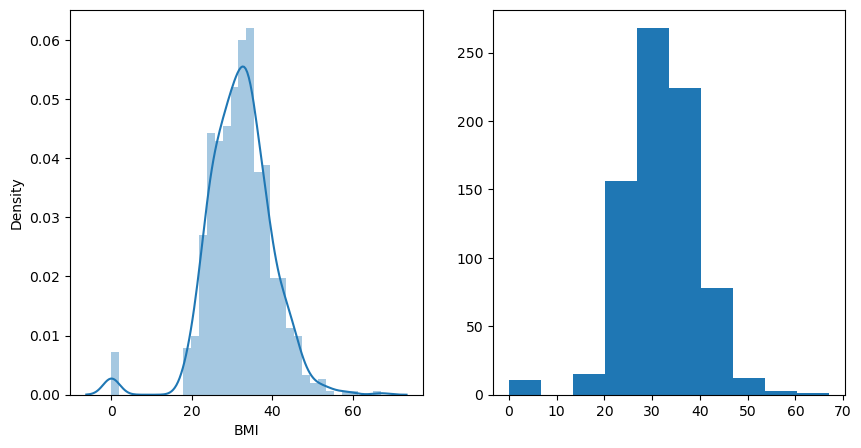

In [34]:
measures_of_dispersion(d_data.BMI)

#### 7. 'DiabetesPedigreeFunction'

In [37]:
boxplot_of(d_data, 'DiabetesPedigreeFunction')

In [38]:
outliers_of(d_data, 'DiabetesPedigreeFunction')

The number of upper outliers= 29

The number of lower outliers= 0

The percentage of outliers= 3.8%


Range= 2.342

Q1= 0.244
Q2= 0.372
Q3= 0.626

IQR= 0.382

Variance= 0.11

Standard Deviation= 0.331

Skewness= 1.92
>>>Positive skew/ Right-skewed Distribution (mode < median < mean) because skewness > 0

Kurtosis= 5.595



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



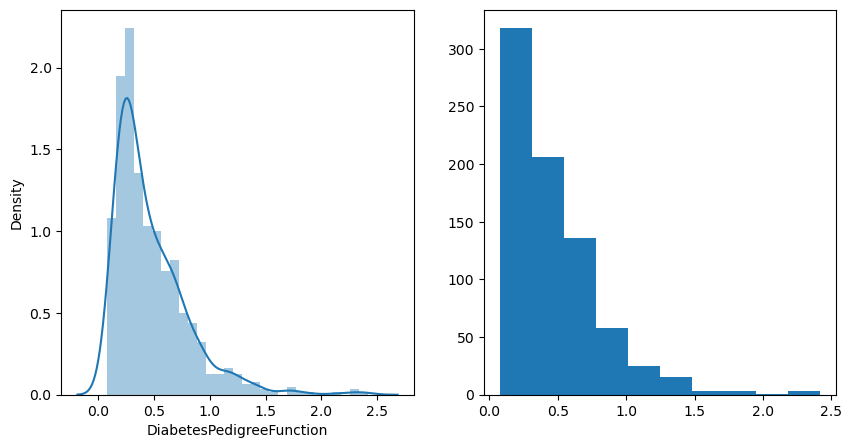

In [39]:
measures_of_dispersion(d_data.DiabetesPedigreeFunction)

#### 8. 'Age'

In [40]:
boxplot_of(d_data, 'Age')

In [41]:
outliers_of(d_data, 'Age')

The number of upper outliers= 9

The number of lower outliers= 0

The percentage of outliers= 1.2%


Range= 60

Q1= 24.0
Q2= 29.0
Q3= 41.0

IQR= 17.0

Variance= 138.303

Standard Deviation= 11.76

Skewness= 1.13
>>>Positive skew/ Right-skewed Distribution (mode < median < mean) because skewness > 0

Kurtosis= 0.643



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



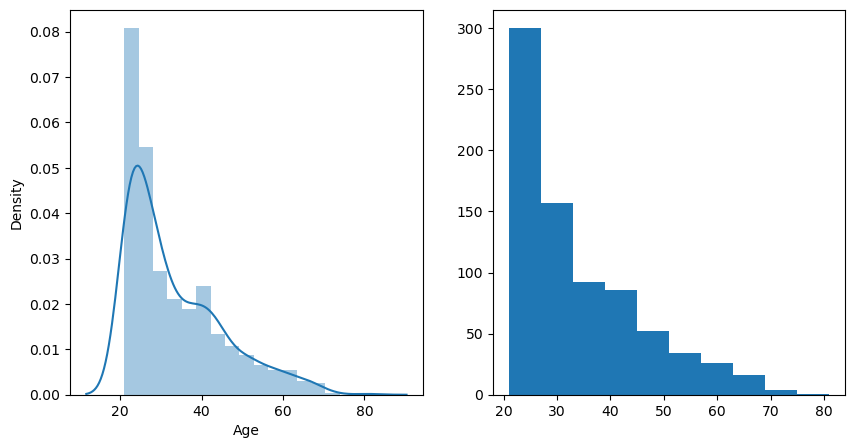

In [42]:
measures_of_dispersion(d_data.Age)

In [ ]:
# import scipy
# zscore_PPE = scipy.stats.zscore(p_data_.PPE)
# outliers_zscore_PPE = zscore_PPE[[(n <= -2.5)|(n >= 2.5) for n in zscore_PPE]]
# indexes = zscore_PPE.tolist().index(outliers_zscore_PPE)
# indexes

## Bi-variate Analysis

- ### Continuous vs. Continuous
### Selecting features

In [52]:
round(d_data[d_data.columns[:-1]].corr(), 2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00


>-1:  a perfect negative/ inverse correlation

>+1: a perfect positive correlation

>0: no linear correlation

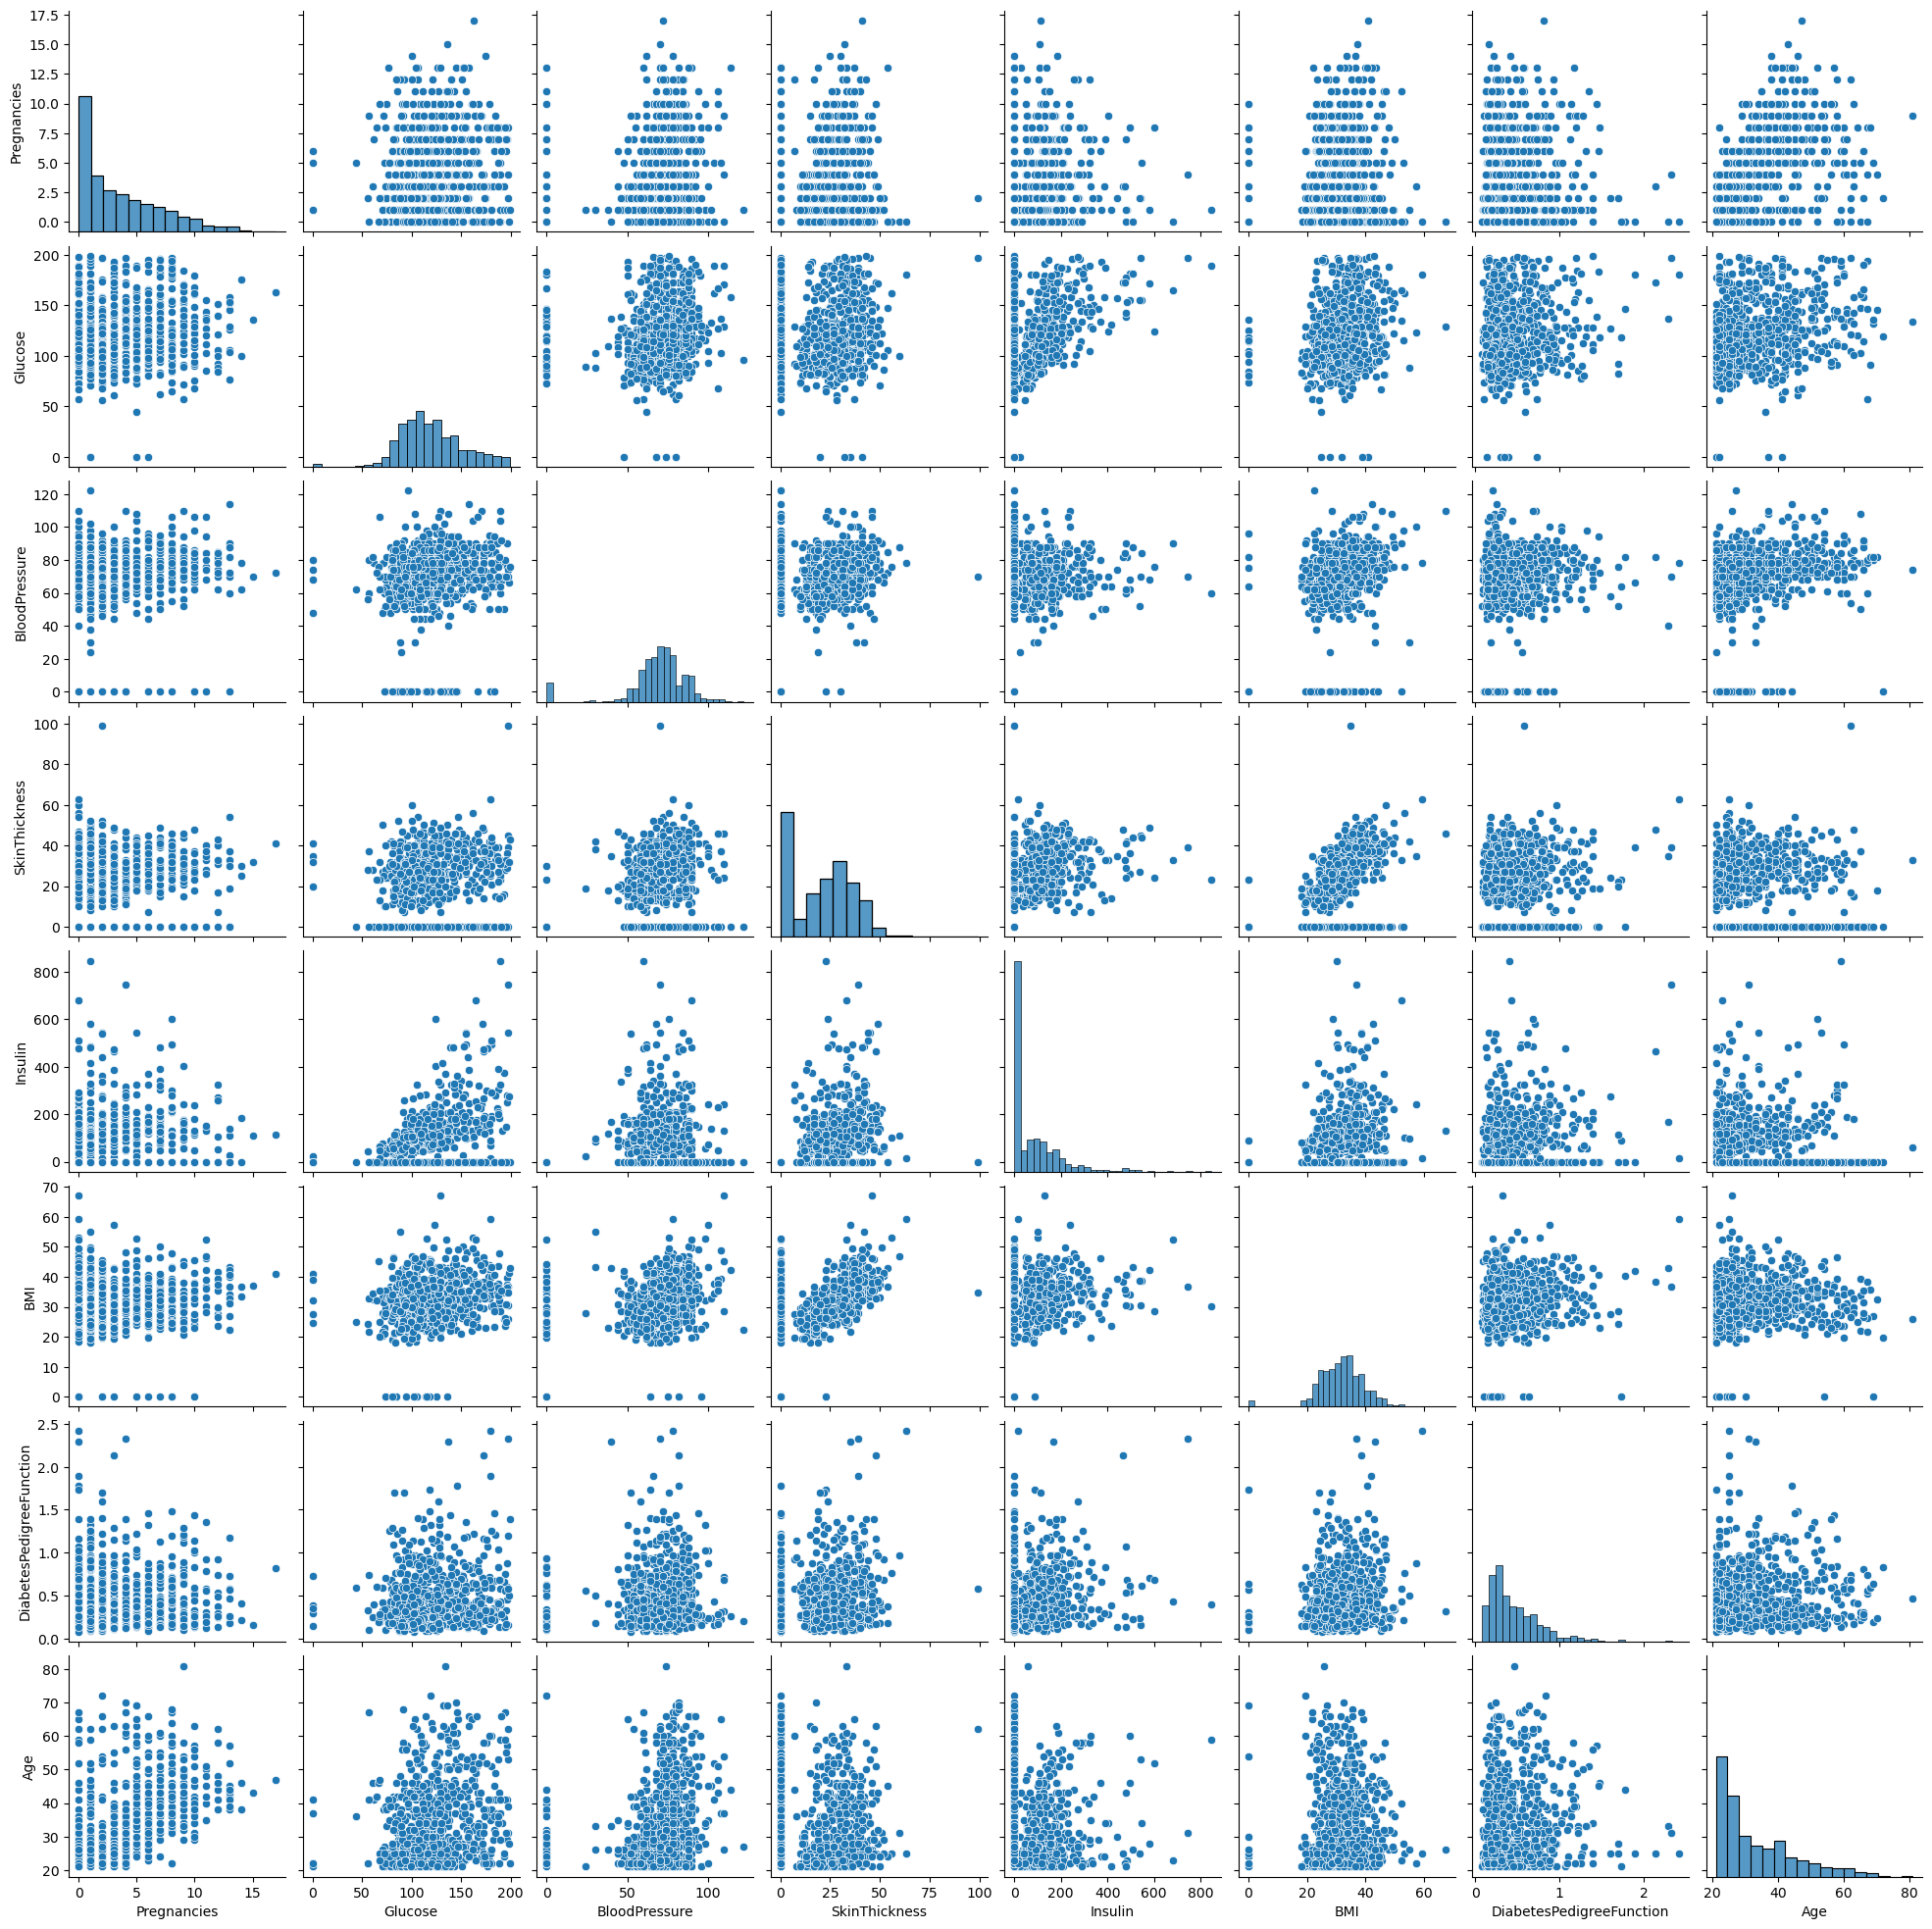

In [53]:
sns.pairplot(d_data[d_data.columns[:-1]])